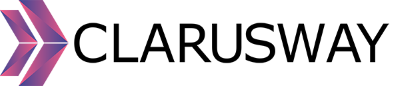

# **NLP: sntiment Analysis and Classification Project**

# ❀

# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Leraning Model
- BERT Model
- Model Comparison

# **Sentiment analysis of women's clothes reviews**


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting, Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


---




## **1. Exploratory Data Analysis**

###### **Import Libraries, Load and Discover the Data**

In [ ]:
import tensorflow as tf
import os
#s used to specify the TPU cluster for distributed training.
#The tpu argument is set to the TPU address obtained from the
#COLAB_TPU_ADDR environment variable. This is specific to Google
#Colab, where the TPU address is provided as an environment variable.
# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
# TPU cluster using the resolver.
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [ ]:
#s creating a TPUStrategy object in TensorFlow, which is used for distributed training on TPUs
strategy = tf.distribute.TPUStrategy(resolver)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#The warnings module provides functions for controlling warnings,
#such as ignoring them or turning them into exceptions.
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [ ]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,4)
#used to configure the Matplotlib plotting library for inline plotting and to set the default figure size

In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Download necessary libraries for Natural Language Processing (NLP)**

In [ ]:
#Natural Language Toolkit is a collection of libraries for natural language processing
import nltk
#punkt used to split text into sentences, which is an important preprocessing step in NLP.
nltk.download('punkt')
#Stopwords are common words (e.g., "the," "and," "is") that are often removed
#from text during text analysis because they don't carry much information.
nltk.download('stopwords')
#wordnet groups words into sets of synonyms (synsets) and provides a hierarchy of hypernyms
#and hyponyms, which helps capture word meanings and relationships.
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#load the data:
df = pd.read_csv("/content/drive/MyDrive/NLP/Womens Clothing E-Commerce Reviews.csv", index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


**The review text is our focus but the target is "Recommended ID" where 0 means not recommended, 1 means recommended.These two columns are the most important columns**

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


(23486, 10)

In [ ]:
#is There any NaN values?
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
sum(df.duplicated())

21

# **Data Wrangling (or data preprocessing)**
**Data wrangling typically involves pre-processing steps such as data collection, cleaning, and organizing. The goal during this process is to transform the data into a usable and meaningful form for subsequent stages.**

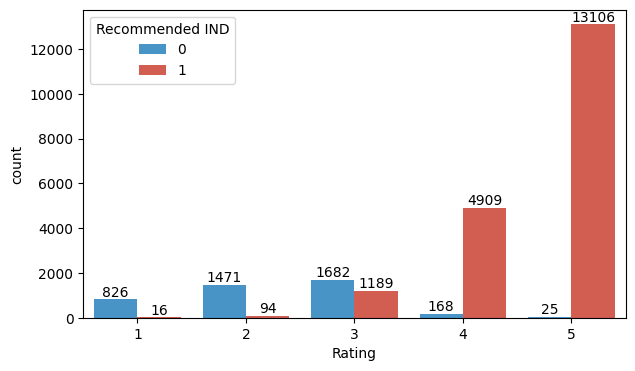

In [ ]:
#checking the ditribution of rating/Recommended IND columns
custom_palette = ["#3498db", "#e74c3c"]
ax = sns.countplot(x="Rating",
                   data=df,
                   hue="Recommended IND",
                   palette=custom_palette)

for p in ax.containers:
    ax.bar_label(p)

plt.show()

In [ ]:
#We can see that we have fewer zeros. However, there are 16 people who didn't like the product but recommended
#it, and there are 94 people who liked the product but didn't recommend it. This is misleading for our model.
#Therefore, if the recommended IND is 0 but the product is recommended, we will not use this information.
#This could be due to mistakes, such as the customer not understanding the rating mechanism or because any reason.
#We will apply a strategy to address this issue.


In [ ]:
#getting all unique values in the "Recommended IND" column
df["Recommended IND"].unique()

array([1, 0])

In [ ]:
#length of the dataframe before edditing
len(df)

23486

In [ ]:
#the people who didn't like the product but recommended
print(len(df[(df["Rating"] == 1) & (df["Recommended IND"] == 1)]))

16


In [ ]:
#here, we'ew saying don't use the 16 and print the length of the data after edditing
len(df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))])

23470

In [ ]:
#doing the same for others so the data will not miss lead the model
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

In [ ]:
#length of the dataframe after edditing
len(df)

21994

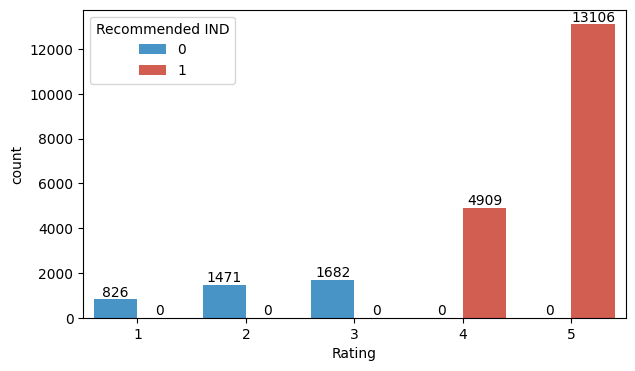

In [ ]:
#checking the ditribution of rating/Recommended IND columns after the strategy
custom_palette = ["#3498db", "#e74c3c"]
ax = sns.countplot(x="Rating",
                   data=df,
                   hue="Recommended IND",
                   palette=custom_palette)

for p in ax.containers:
    ax.bar_label(p)

plt.show()

#### **Check Proportion of Target Class Variable:**

**The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".**

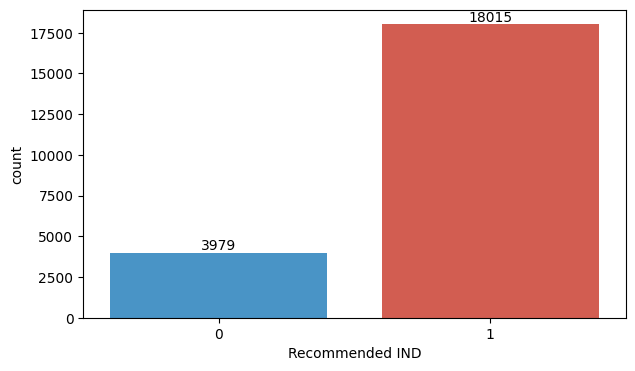

In [ ]:
ax = sns.countplot(x="Recommended IND",
                   data=df,
                   palette=["#3498db", "#e74c3c"])
ax.bar_label(ax.containers[0]);
#We can observe that class 1, which represents positive sentiment, is the dominant class, and people
# who recommended the product are the most numeroum. We should consider this while evaluating our model

## **2. Feature Selection and Data Cleaning**

**From now on, the DataFrame you will work with should contain two columns: *"Review Text"* and "*Recommended IND*". You can do the missing value detection operations from now on. You can also rename the column names if you want.**



In [ ]:
#Rennaming the colmuns so it'll be more easier to handel
df.rename(columns={"Review Text":"text", "Recommended IND":"label"},
          inplace=True)
df.head(1)

,Clothing ID,Age,Title,text,Rating,label,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates


In [ ]:
#New dataset that contain the only columns we need:
df=df[['text','label']]
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


### **Missing Value Detection**
**We've checked and found there's NaN values in the dtat, but about the new data?**

In [ ]:
df.isnull().sum()

text     819
label      0
dtype: int64

In [ ]:
#Dropping the missing values:
df.dropna(inplace = True)
# resets the index of the DataFrame df, removes the existing index columns,
#and modifies the DataFrame in place. After this operation, the DataFrame will
#have a default integer index, and any existing index columns will be removed.
df.reset_index(drop=True,
               inplace=True)
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0


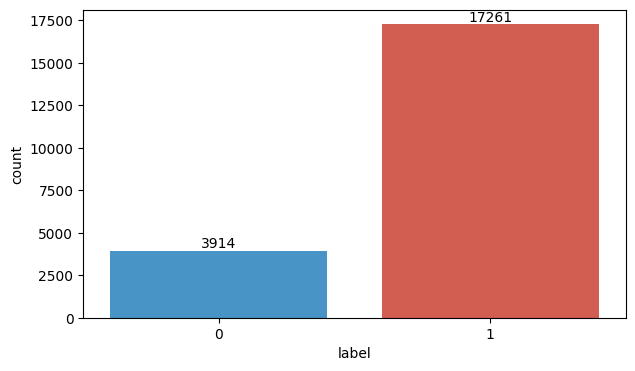

In [ ]:
#Checing the class distrbuation after dropping NaN values:
ax = sns.countplot(x="label",
                   data=df,
                   palette=["#3498db", "#e74c3c"])
ax.bar_label(ax.containers[0]);

-------------------------------------------------------------------------------------------------

## **3. Text Mining**

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [ ]:
#Stopwords are words that are commonly used in a language but are typically
#ignored in text analysis because they don't carry much meaning (e.g., "the," "and," "is").
stop_words = stopwords.words('english')
#This loop iterates over the words "not" and "no" and removes them from the stop_words list
for i in ["not", "no"]:
        stop_words.remove(i)

In [ ]:
def cleaning(data):

    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())
    #The .replace("'", "") part removes single quotes from the text.
    #The .lower() method converts all the text to lowercase.

    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    #he function filters out tokens that are alphanumeric,
    #keeping only alphabetical words. This removes punctuation and numbers.

    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    #used to remove stopwords. The stopwords are assumed to be stored in a variable
    #named stop_words, which is expected to be defined elsewhere in your code.

    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    # lemmatize each token. Lemmatization reduces words to their base or root form.
    #The lemmatized tokens are stored in the list text_cleaned.

    #joining
    return " ".join(text_cleaned)
    #the cleaned and lemmatized tokens are joined into a single string
    #using the join method, and this cleaned text is returned by the function.

##**4. WordCloud - Repetition of Words**

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### **Detect Reviews (positive and negative separately)**

In [ ]:
#Creating 2 different dataframes, one for positive sentences, the other for negative sentences
#Then we'll inspect them separately

# select only those rows where the "label" is equal to 1.
#The result is a Pandas Series containing the "text" column for sentences labeled as positive
positive_sentences = df[df["label"] == 1]["text"]
positive_sentences = positive_sentences.apply(cleaning)
positive_sentences
#this code is focused on extracting and cleaning sentences labeled as positive from a DataFrame.
#The cleaning process involves tokenization, removing punctuation and numbers, removing stopwords,
#and lemmatization, as defined in the cleaning function. The cleaned sentences are stored in the positive_sentences variable.

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
21168    bottom cute defiantly cheeky would recommend s...
21169    im impressed beautiful color combination embro...
21171    wasnt sure ordering skirt couldnt see person f...
21172    happy snag dress great price easy slip flatter...
21174    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 17261, dtype: object

In [ ]:
#Same thing with the code above, but with the negative sentences
## select only those rows where the "label" is equal to 0=not recommanded
negative_sentences = df[df["label"] == 0]["text"]
negative_sentences = negative_sentences.apply(cleaning)
negative_sentences

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
20       first not pullover styling side zipper wouldnt...
22       loved material didnt really look long dress pu...
                               ...                        
21145    tried color really pretty fun donset want pair...
21146    wanted love jacket soft great color unfortunat...
21155    purchased good price typically love maeve fabr...
21170    surprised positive review product terrible cut...
21173    fit well top see never would worked im glad ab...
Name: text, Length: 3914, dtype: object

### **Collect Words (positive and negative separately)**

In [ ]:
#This code retrieves the first 1000 characters from the positive_words string, providing a preview of the content.
positive_words = " ".join(positive_sentences)
positive_words[:1000] #Randoom

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose no xx kept wil ldecide later since light color alread

In [ ]:
##This code retrieves the first 1000 characters from the negative_words string, providing a preview of the content.
negative_words = " ".join(negative_sentences)
negative_words[:1000] #Randoom

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first not pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning im sure fi

###**Create Word Cloud (for most common words in recommended not recommended reviews separately)**

In [ ]:
#used for creating word clouds, which are visual representations of words
#where the size of each word is proportional to its frequency in a given text.
from wordcloud import WordCloud

In [ ]:
#creating an instance of the WordCloud class for generating a word cloud with specific configurations.
#max_words =250: determines the maximum number of words to display in the word cloud
# scale=3: controls the scaling of the word cloud. It affects the resolution of the generated image.
wordcloud_positive = WordCloud(background_color="pink", max_words =250, scale=3)

In [ ]:
# used to generate the word cloud based on the specified text data.
wordcloud_positive.generate(positive_words)

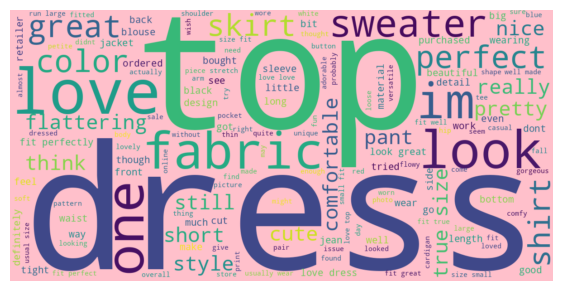

In [ ]:
#display the word cloud
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
#This line turns off the axis labels and ticks in the plot.
# This is common when displaying word clouds because the position
#of words is more important than their specific coordinates on the plot.
plt.show()

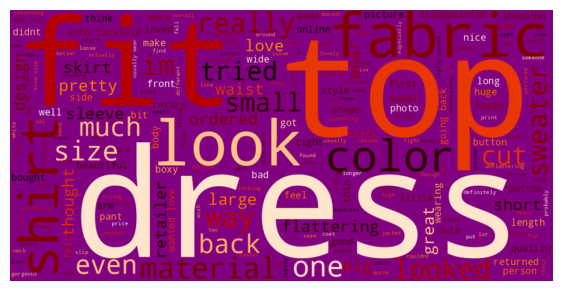

In [ ]:
wordcloud_negative = WordCloud(background_color="purple",  max_words=250, colormap='gist_heat', scale=3)

wordcloud_negative.generate(negative_words)
plt.imshow(wordcloud_negative,
           interpolation="bilinear")
plt.axis("off")
plt.show()
#we can see that we have less negative words,

__________________________________________________________________

# **5. Sentiment Classification with Machine Learning and Deep Learning**

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**
**For BERT model, use TF tensor.**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting,
- Deep Learning Model,
- BERT Model.

### **Train - Test Split**

**To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.**

***First we spliting the data into train and test sets:***

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df["text"].values
y = df["label"].map({0:1, 1:0}).values
#This line extracts the values from the "label" column of the DataFrame df and maps them to a binary classification format.
#Specifically, it swaps the labels: 0 becomes 1, and 1 becomes 0. The resulting Series is then converted to a NumPy array and assigned to the variable y.
#This is common when dealing with binary classification tasks, and it ensures that the labels are in a format suitable for many machine learning algorithms.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,  stratify=y,  random_state=101)

In the next step we create a numerical feature vector for each document:

##**Count Vectorization & TfidfVectorizer**

**TfidfVectorizer:**

--- The TfidfVectorizer stands for Term Frequency-Inverse Document Frequency. It is similar to CountVectorizer, but instead of counting word occurrences, it computes the TF-IDF value for each word. TF-IDF reflects the importance of a word in a document relative to its importance in the entire corpus. It is a more advanced method that takes into account not only the frequency of a word in a document but also its rarity across documents.

**CountVectorizer:**

--- The CountVectorizer is used to convert a collection of text documents to a matrix of token counts. It counts the number of times each word appears in a document (bag-of-words representation) and creates a matrix where each row corresponds to a document, and each column corresponds to a unique word in the entire corpus. The values in the matrix represent the count of each word in the respective documents.


-------------------------------------------------------------------

### **Count Vectorization**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#CountVectorizer is a text feature extraction method that transforms a collection of text documents into a matrix of token counts.
#Each row in the matrix represents a document, and each column represents a unique word (token) in the entire set of documents.
#This class is used to convert a collection of text documents to a matrix of token counts.

In [ ]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3, max_df=0.90)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
#convert the sparse matrix representation of the document-term matrix X_train_count into a dense NumPy array
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#converting the dense NumPy array obtained from X_train_count.toarray()
#into a Pandas DataFrame, and it's assigning column names based on the
#feature names obtained from the CountVectorizer.
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,...,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **TF-IDF**

In [ ]:
# is another popular text vectorization technique, specifically designed to
#transform a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#The fit_transform method is used on the training data (X_train).
#This method learns the vocabulary and IDF (Inverse Document Frequency)
#from the training data and returns a TF-IDF-weighted document-term matrix.
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning,
                                    min_df=3,
                                    max_df=0.90)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
#is used to convert the sparse matrix representation of the TF-IDF-weighted
#document-term matrix X_train_tf_idf into a dense NumPy array.
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##**Eval functions**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [ ]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## **Logistic Regression**

### **CountVectorizer**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.01,
                         max_iter=1000,
                         class_weight= "balanced",
                         random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [ ]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)
#by seeing the results, the recall is very good, and there's no sign og overfitting

LOG MODEL
[[1484  243]
 [  52  339]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1727
           1       0.58      0.87      0.70       391

    accuracy                           0.86      2118
   macro avg       0.77      0.86      0.80      2118
weighted avg       0.90      0.86      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     15534
           1       0.63      0.90      0.74      3523

    accuracy                           0.88     19057
   macro avg       0.80      0.89      0.83     19057
weighted avg       0.91      0.88      0.89     19057



In [ ]:
#Apply cross validation to ensure there's no overfitting
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C =0.01,
                           max_iter=1000,
                           class_weight= "balanced",
                           random_state=101)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]
#we can see there's no overfitting

test_accuracy      0.873906
train_accuracy     0.884131
test_f1            0.719061
train_f1           0.741943
test_recall        0.872542
train_recall       0.901000
test_precision     0.611845
train_precision    0.630623
dtype: float64

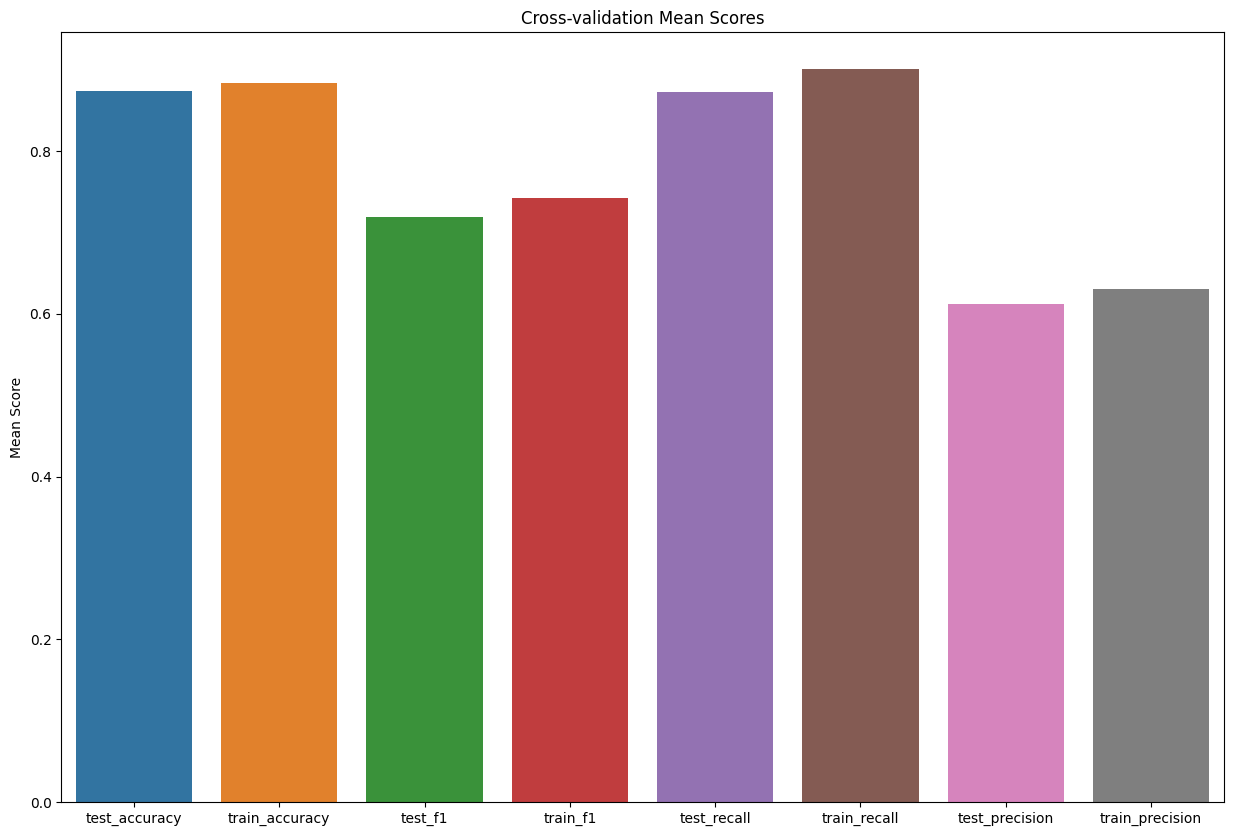

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
# Plot the mean scores
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.title('Cross-validation Mean Scores')
plt.ylabel('Mean Score')
plt.show()


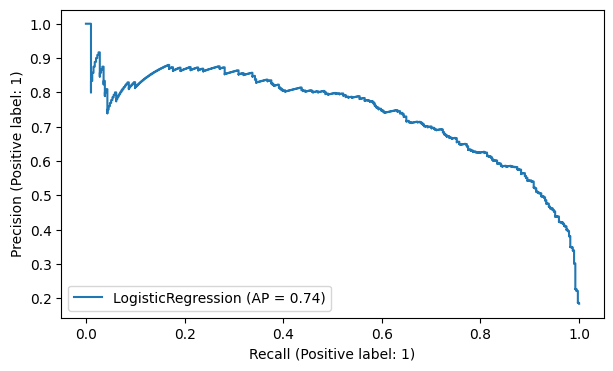

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
plt.rcParams["figure.figsize"] = (7,4)

PrecisionRecallDisplay.from_estimator(log,
                                      X_test_count,
                                      y_test);

In [ ]:
y_pred = log.predict(X_test_count)
y_pred_proba= log.predict_proba(X_test_count)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### **TF-IDF**

In [ ]:
log = LogisticRegression(C=0.06,
                         max_iter=1000,
                         random_state=101,
                         class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [ ]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1464  263]
 [  49  342]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1727
           1       0.57      0.87      0.69       391

    accuracy                           0.85      2118
   macro avg       0.77      0.86      0.80      2118
weighted avg       0.89      0.85      0.86      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     15534
           1       0.61      0.90      0.73      3523

    accuracy                           0.88     19057
   macro avg       0.79      0.89      0.82     19057
weighted avg       0.91      0.88      0.88     19057



In [ ]:
model = LogisticRegression(C=0.06,
                           max_iter=1000,
                           random_state=101,
                           class_weight="balanced")
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.867084
train_accuracy     0.875158
test_f1            0.710168
train_f1           0.728379
test_recall        0.880782
train_recall       0.905447
test_precision     0.595173
train_precision    0.609239
dtype: float64

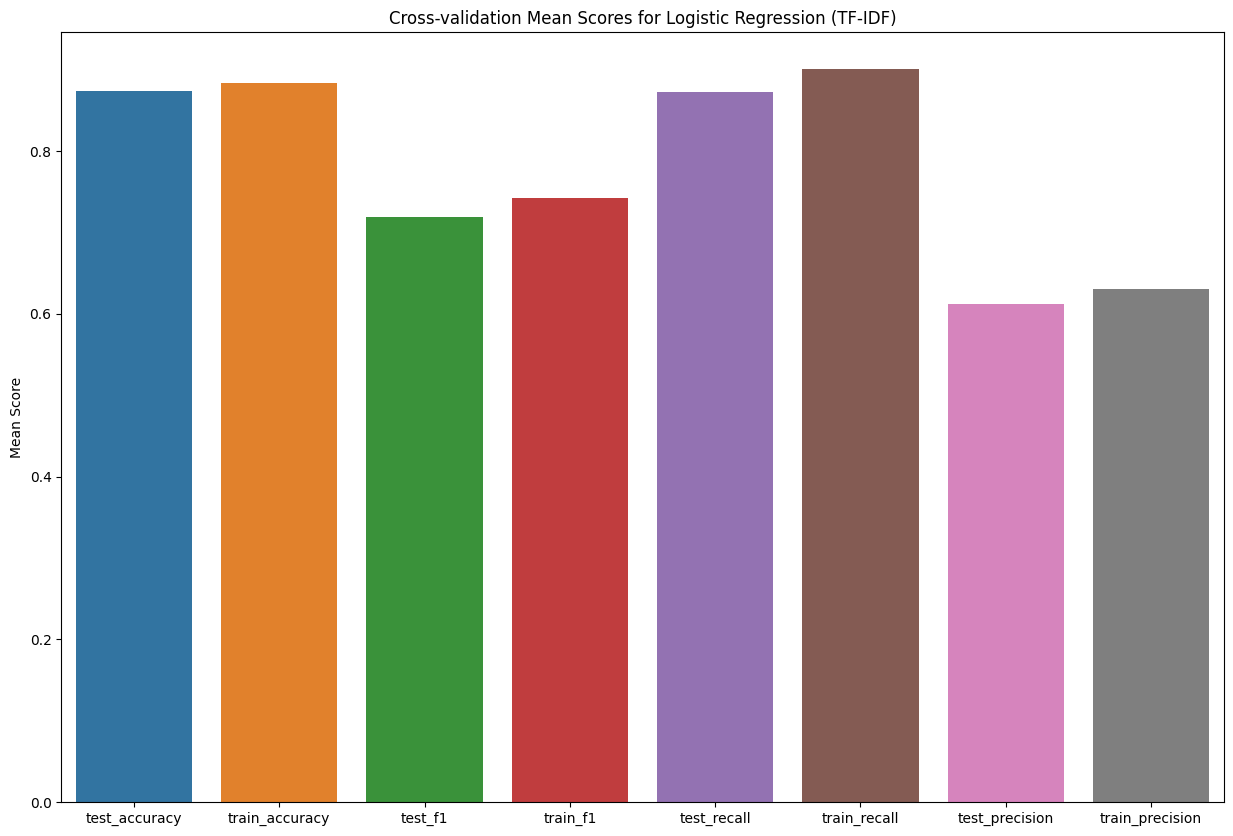

In [ ]:
# Plot the mean scores
plt.rcParams["figure.figsize"] = (15,10)
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.title('Cross-validation Mean Scores for Logistic Regression (TF-IDF)')
plt.ylabel('Mean Score')
plt.show()


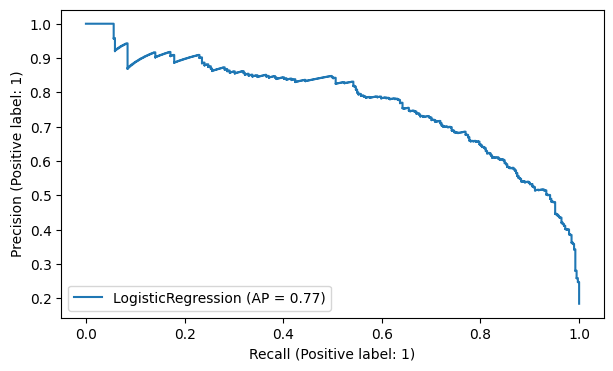

In [ ]:
plt.rcParams["figure.figsize"] = (7,4)
PrecisionRecallDisplay.from_estimator(log,
                                      X_test_tf_idf,
                                      y_test);

In [ ]:
y_pred = log.predict(X_test_tf_idf)
y_pred_proba= log.predict_proba(X_test_tf_idf)[:,1]


log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## **Naive Bayes**

### **Countvectorizer**

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=1.5)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=1.5)

In [ ]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[1609  118]
 [  78  313]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1727
           1       0.73      0.80      0.76       391

    accuracy                           0.91      2118
   macro avg       0.84      0.87      0.85      2118
weighted avg       0.91      0.91      0.91      2118

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     15534
           1       0.76      0.84      0.80      3523

    accuracy                           0.92     19057
   macro avg       0.86      0.89      0.87     19057
weighted avg       0.93      0.92      0.92     19057



In [ ]:
model = MultinomialNB(alpha=1.5)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.906439
train_accuracy     0.922577
test_f1            0.757743
train_f1           0.799851
test_recall        0.791652
train_recall       0.836818
test_precision     0.726964
train_precision    0.766018
dtype: float64

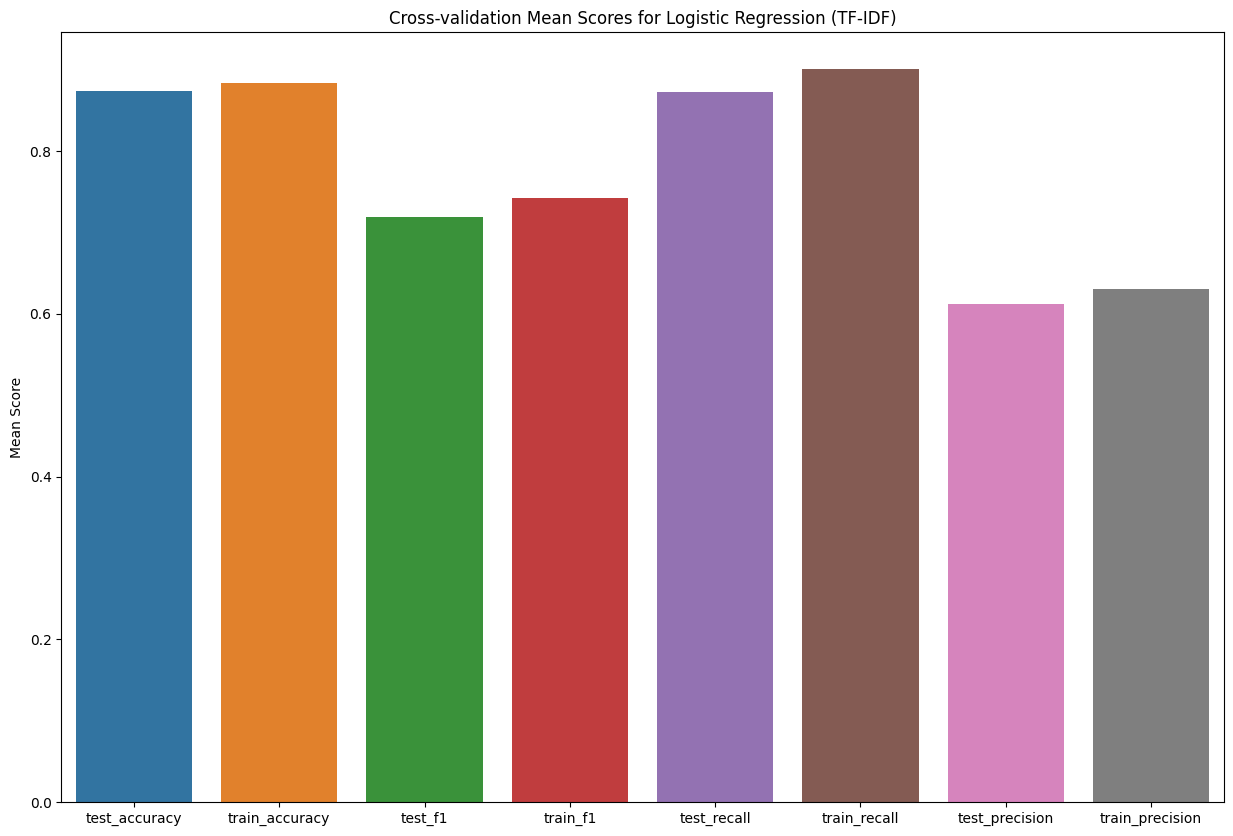

In [ ]:
# Plot the mean scores
plt.rcParams["figure.figsize"] = (15,10)
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.title('Cross-validation Mean Scores for Logistic Regression (TF-IDF)')
plt.ylabel('Mean Score')
plt.show()

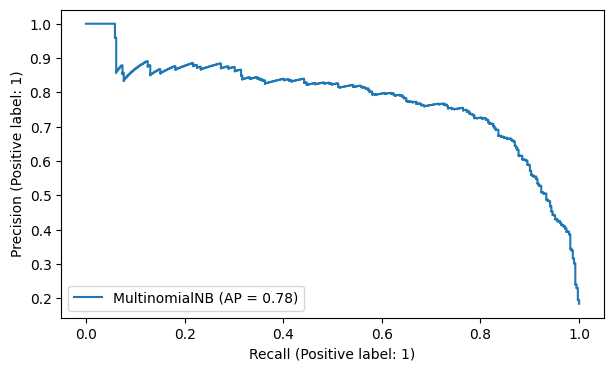

In [ ]:
plt.rcParams["figure.figsize"] = (7,4)
PrecisionRecallDisplay.from_estimator(nb,
                                      X_test_count,
                                      y_test);

In [ ]:
y_pred = nb.predict(X_test_count)
y_pred_proba= nb.predict_proba(X_test_count)[:,1]

nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### **TF-IDF**

In [ ]:
nb = BernoulliNB(alpha=0.7)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.7)

In [ ]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[1599  128]
 [  77  314]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1727
           1       0.71      0.80      0.75       391

    accuracy                           0.90      2118
   macro avg       0.83      0.86      0.85      2118
weighted avg       0.91      0.90      0.91      2118

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     15534
           1       0.75      0.84      0.79      3523

    accuracy                           0.92     19057
   macro avg       0.86      0.89      0.87     19057
weighted avg       0.92      0.92      0.92     19057



In [ ]:
model = BernoulliNB(alpha=0.7)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy      0.900876
train_accuracy     0.918933
test_f1            0.746102
train_f1           0.792657
test_recall        0.787679
train_recall       0.838206
test_precision     0.708829
train_precision    0.751806
dtype: float64

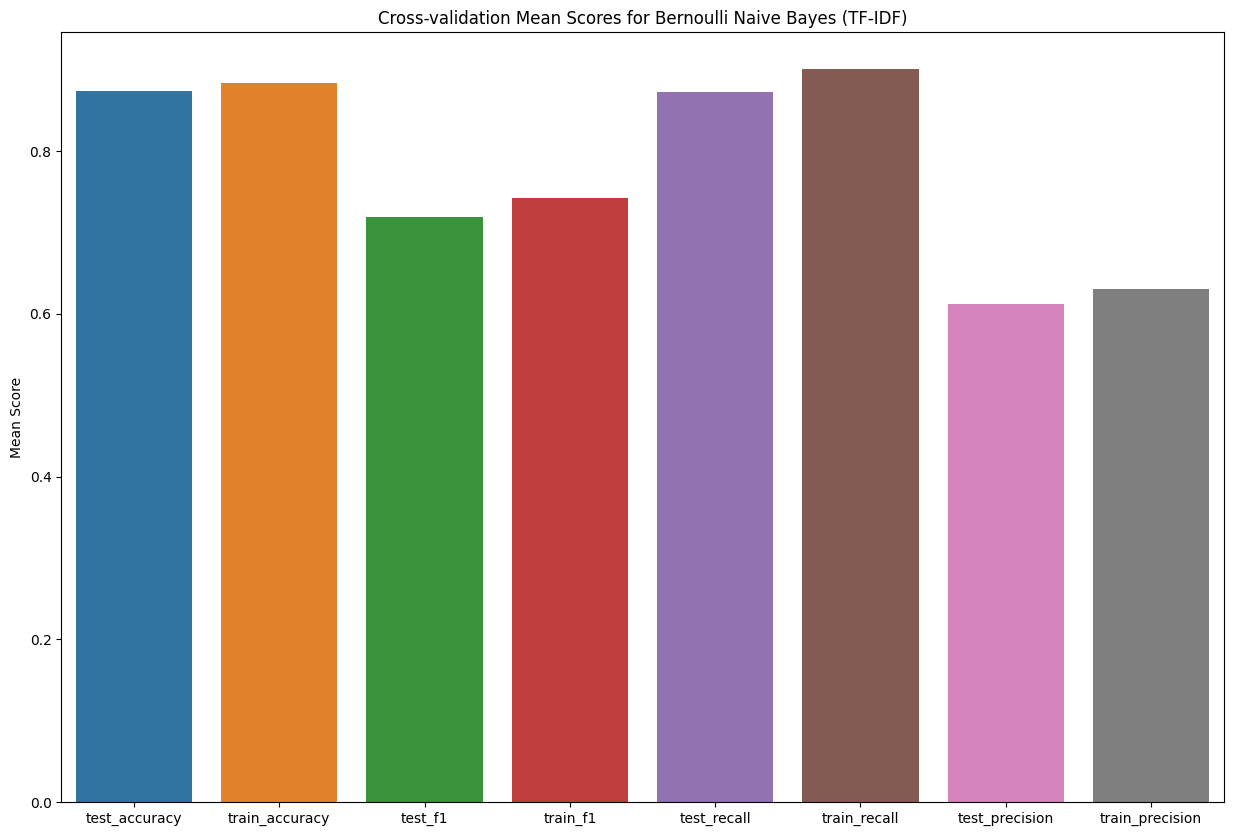

In [ ]:
# Plot the mean scores
plt.figure(figsize=(15, 10))
bar_plot = sns.barplot(x=mean_scores.index, y=mean_scores.values)
bar_plot.set_title('Cross-validation Mean Scores for Bernoulli Naive Bayes (TF-IDF)')
bar_plot.set_ylabel('Mean Score')

# Show the plot
plt.show()

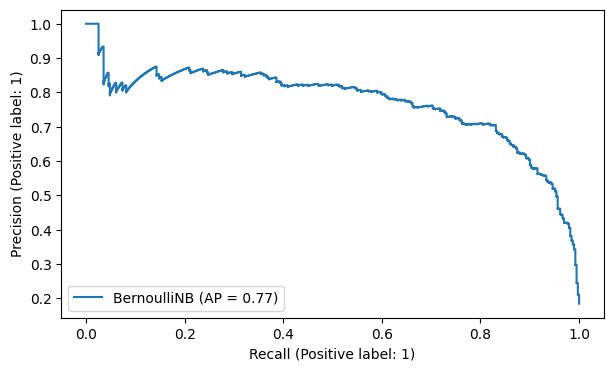

In [ ]:
PrecisionRecallDisplay.from_estimator(nb,
                                      X_test_tf_idf,
                                      y_test);

In [ ]:
y_pred = nb.predict(X_test_tf_idf)
y_pred_proba= nb.predict_proba(X_test_tf_idf)[:,1]


nb_AP_tfidf = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## **Support Vector Machine (SVM)**

###**Countvectorizer**

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.001,
                class_weight="balanced",
                random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [ ]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[1484  243]
 [  53  338]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1727
           1       0.58      0.86      0.70       391

    accuracy                           0.86      2118
   macro avg       0.77      0.86      0.80      2118
weighted avg       0.89      0.86      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     15534
           1       0.64      0.90      0.75      3523

    accuracy                           0.89     19057
   macro avg       0.81      0.89      0.84     19057
weighted avg       0.91      0.89      0.89     19057



In [ ]:
model = LinearSVC(C=0.001,
                  class_weight="balanced",
                  random_state=101)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.874902
train_accuracy     0.885612
test_f1            0.720888
train_f1           0.745156
test_recall        0.873676
train_recall       0.904595
test_precision     0.613916
train_precision    0.633506
dtype: float64

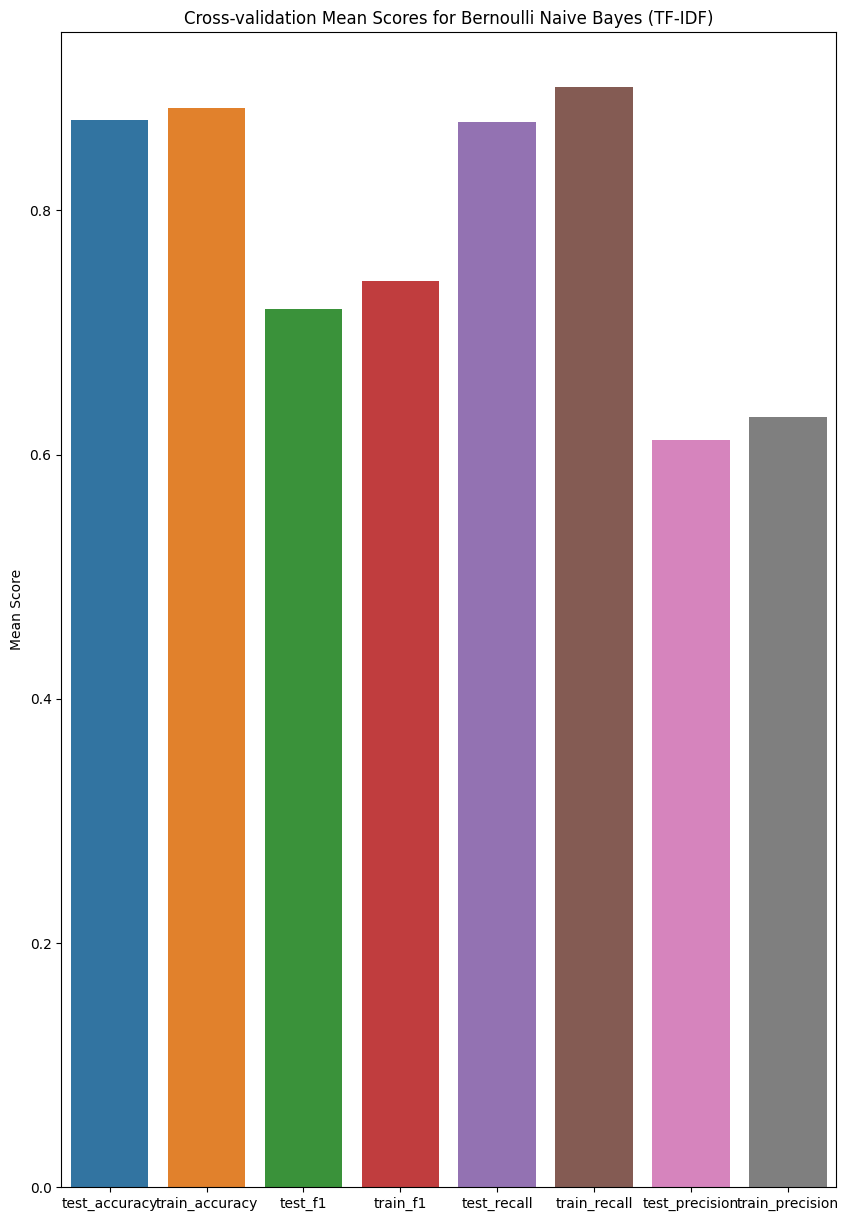

In [ ]:
# Plot the mean scores
plt.figure(figsize=(10, 15))
bar_plot = sns.barplot(x=mean_scores.index, y=mean_scores.values)
bar_plot.set_title('Cross-validation Mean Scores for Bernoulli Naive Bayes (TF-IDF)')
bar_plot.set_ylabel('Mean Score')

# Show the plot
plt.show()

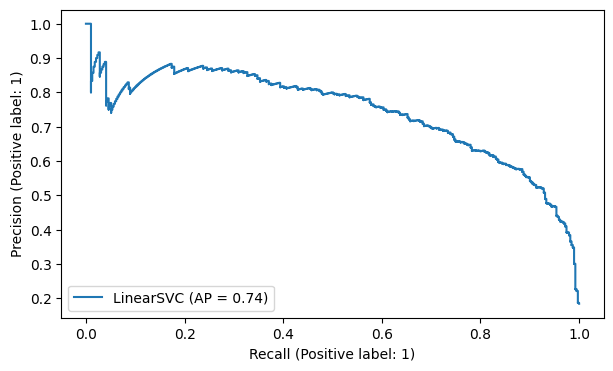

In [ ]:
PrecisionRecallDisplay.from_estimator(svc,
                                      X_test_count,
                                      y_test);

In [ ]:
y_pred = svc.predict(X_test_count)
decision_function= svc.decision_function(X_test_count)

svc_AP_count = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

###**TD-IDF**

In [ ]:
svc = LinearSVC(C=0.03,
                class_weight="balanced",
                random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [ ]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[1496  231]
 [  40  351]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1727
           1       0.60      0.90      0.72       391

    accuracy                           0.87      2118
   macro avg       0.79      0.88      0.82      2118
weighted avg       0.91      0.87      0.88      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.94     15534
           1       0.66      0.93      0.77      3523

    accuracy                           0.90     19057
   macro avg       0.82      0.91      0.85     19057
weighted avg       0.92      0.90      0.91     19057



In [ ]:
model = LinearSVC(C=0.03,
                  class_weight="balanced",
                  random_state=101)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.883666
train_accuracy     0.899022
test_f1            0.738228
train_f1           0.773624
test_recall        0.886735
train_recall       0.933327
test_precision     0.632754
train_precision    0.660593
dtype: float64

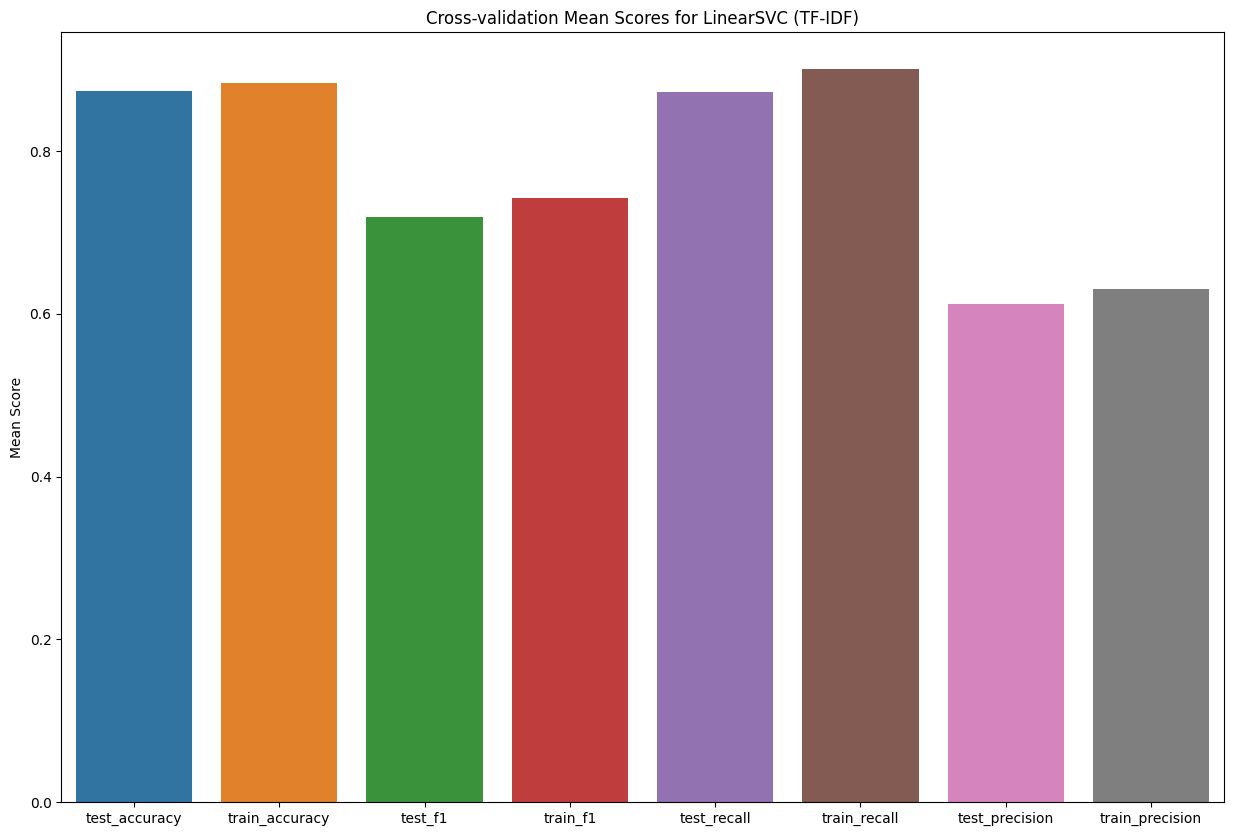

In [ ]:
# Plot the mean scores
plt.figure(figsize=(15, 10))
bar_plot = sns.barplot(x=mean_scores.index, y=mean_scores.values)
bar_plot.set_title('Cross-validation Mean Scores for LinearSVC (TF-IDF)')
bar_plot.set_ylabel('Mean Score')

# Show the plot
plt.show()

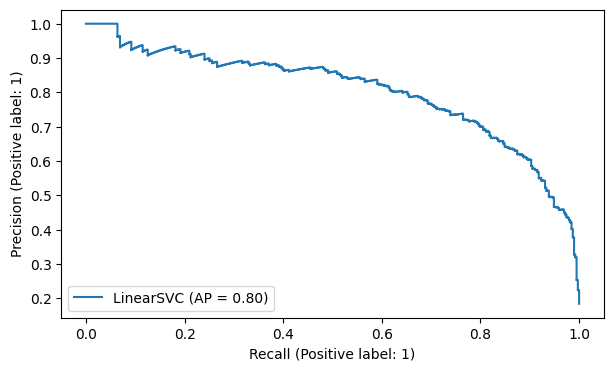

In [ ]:
PrecisionRecallDisplay.from_estimator(svc,
                                      X_test_tf_idf,
                                      y_test);

In [ ]:
y_pred = svc.predict(X_test_tf_idf)
decision_function= svc.decision_function(X_test_tf_idf)

svc_AP_tfidf = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## **Random Forest**

### **Countvectorizer**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100,
                            max_depth = 7,
                            random_state = 42,
                            n_jobs = -1,
                            class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [ ]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1458  269]
 [  61  330]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1727
           1       0.55      0.84      0.67       391

    accuracy                           0.84      2118
   macro avg       0.76      0.84      0.78      2118
weighted avg       0.88      0.84      0.86      2118

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     15534
           1       0.60      0.88      0.71      3523

    accuracy                           0.87     19057
   macro avg       0.78      0.87      0.81     19057
weighted avg       0.90      0.87      0.88     19057



In [ ]:
model = RandomForestClassifier(100,
                               max_depth = 7,
                               random_state = 42,
                               n_jobs = -1,
                               class_weight="balanced")
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.853755
train_accuracy     0.870453
test_f1            0.676497
train_f1           0.712555
test_recall        0.826562
train_recall       0.868105
test_precision     0.572841
train_precision    0.604452
dtype: float64

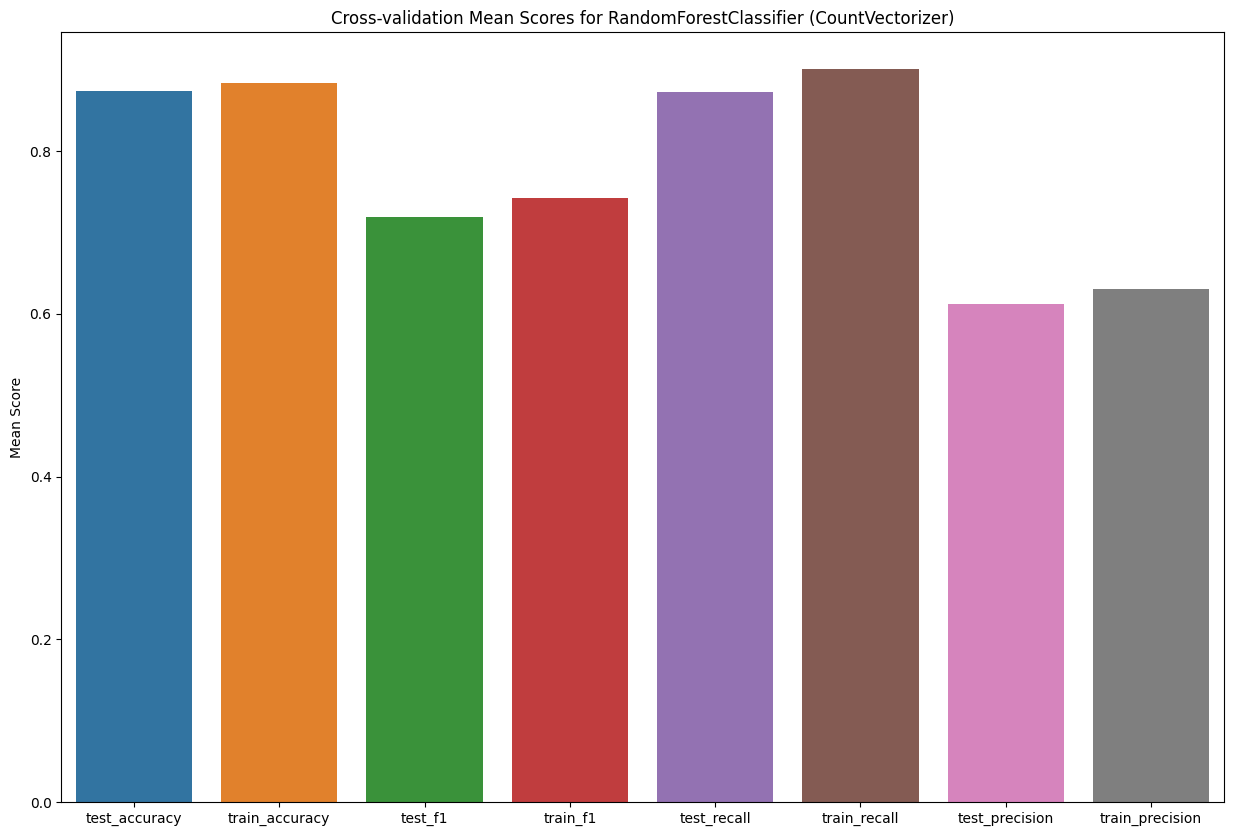

In [ ]:
# Plot the mean scores
plt.figure(figsize=(15, 10))
bar_plot = sns.barplot(x=mean_scores.index, y=mean_scores.values)
bar_plot.set_title('Cross-validation Mean Scores for RandomForestClassifier (CountVectorizer)')
bar_plot.set_ylabel('Mean Score')

# Show the plot
plt.show()

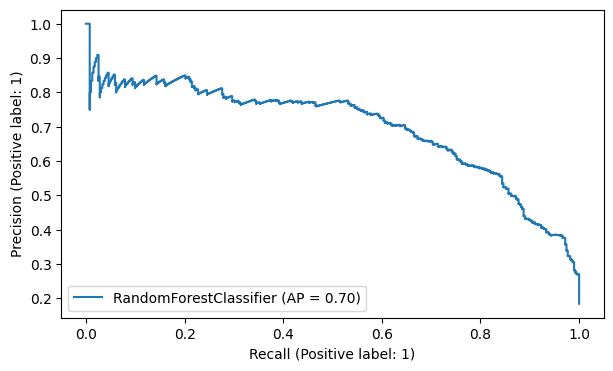

In [ ]:
PrecisionRecallDisplay.from_estimator(rf,
                                      X_test_count,
                                      y_test);

In [ ]:
y_pred = rf.predict(X_test_count)
y_pred_proba= rf.predict_proba(X_test_count)[:,1]

rf_AP_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

## **TF-IDF**

In [ ]:
rf = RandomForestClassifier(100,
                            max_depth = 7,
                            random_state = 42,
                            n_jobs = -1,
                            class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [ ]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[1433  294]
 [  64  327]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1727
           1       0.53      0.84      0.65       391

    accuracy                           0.83      2118
   macro avg       0.74      0.83      0.77      2118
weighted avg       0.88      0.83      0.84      2118

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     15534
           1       0.58      0.89      0.70      3523

    accuracy                           0.86     19057
   macro avg       0.78      0.87      0.81     19057
weighted avg       0.90      0.86      0.87     19057



In [ ]:
model = RandomForestClassifier(100,
                               max_depth = 7,
                               random_state = 42,
                               n_jobs = -1,
                               class_weight="balanced")
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.842001
train_accuracy     0.866249
test_f1            0.658908
train_f1           0.709904
test_recall        0.824863
train_recall       0.884883
test_precision     0.548820
train_precision    0.592852
dtype: float64

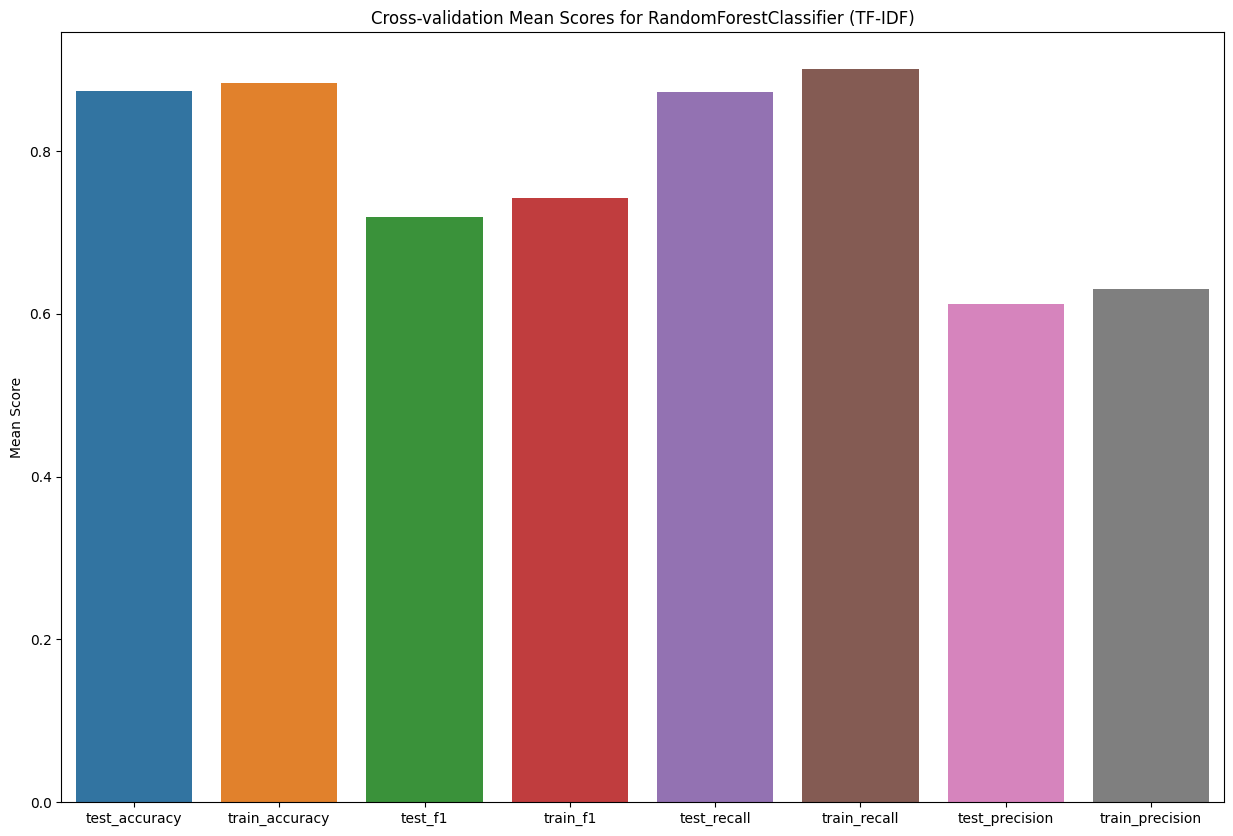

In [ ]:
# Plot the mean scores
plt.figure(figsize=(15, 10))
bar_plot = sns.barplot(x=mean_scores.index, y=mean_scores.values)
bar_plot.set_title('Cross-validation Mean Scores for RandomForestClassifier (TF-IDF)')
bar_plot.set_ylabel('Mean Score')

# Show the plot
plt.show()


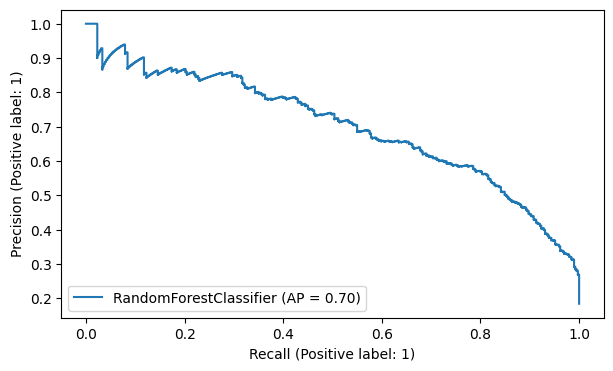

In [ ]:
PrecisionRecallDisplay.from_estimator(rf,
                                      X_test_tf_idf,
                                      y_test);

In [ ]:
y_pred = rf.predict(X_test_tf_idf)
y_pred_proba= rf.predict_proba(X_test_tf_idf)[:,1]

rf_AP_tfidf = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## **Ada Boosting**

###**Countvectorizer**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 100,
                         random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[1638   89]
 [ 168  223]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1727
           1       0.71      0.57      0.63       391

    accuracy                           0.88      2118
   macro avg       0.81      0.76      0.78      2118
weighted avg       0.87      0.88      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     15534
           1       0.77      0.61      0.68      3523

    accuracy                           0.89     19057
   macro avg       0.84      0.78      0.81     19057
weighted avg       0.89      0.89      0.89     19057



In [ ]:
model = AdaBoostClassifier(n_estimators= 100,
                           random_state = 42)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.889175
train_accuracy     0.894008
test_f1            0.663536
train_f1           0.678427
test_recall        0.591257
train_recall       0.604820
test_precision     0.756811
train_precision    0.772458
dtype: float64

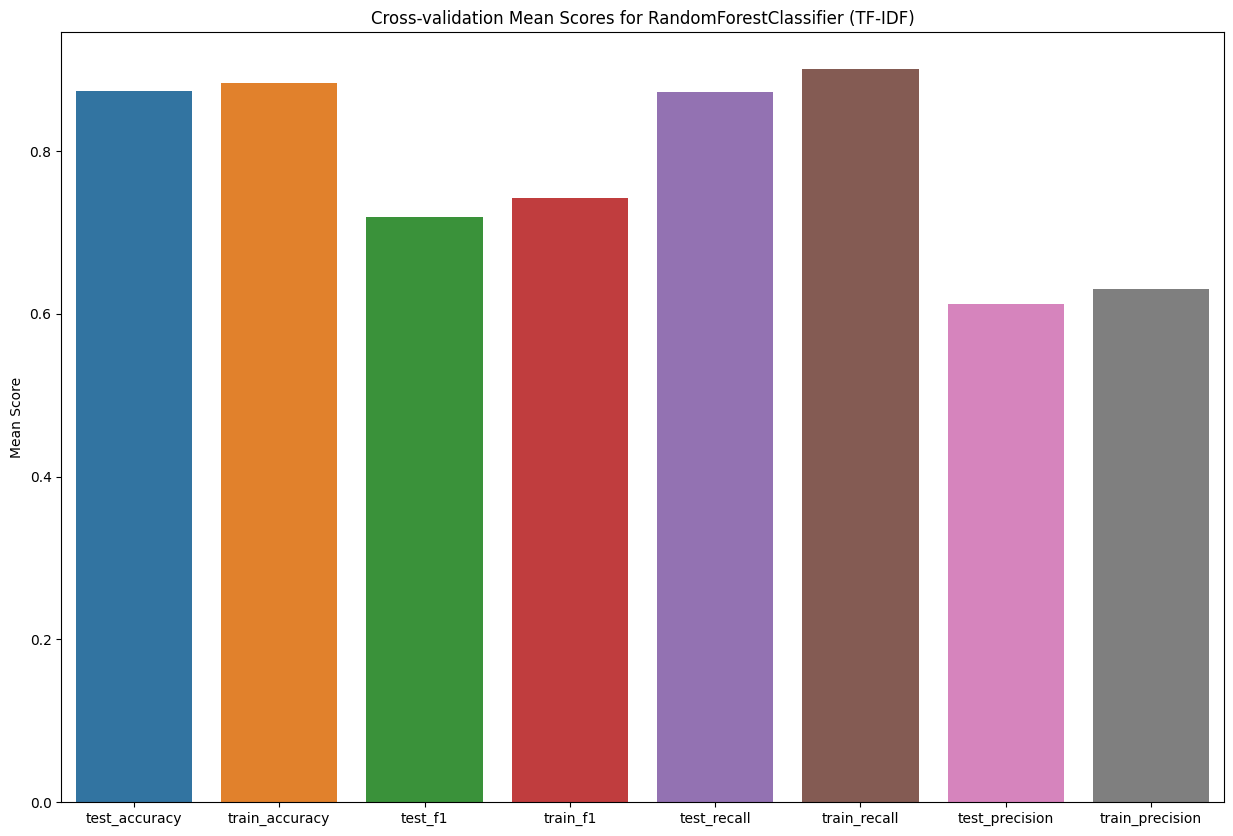

In [ ]:
# Plot the mean scores
plt.figure(figsize=(15, 10))
bar_plot = sns.barplot(x=mean_scores.index, y=mean_scores.values)
bar_plot.set_title('Cross-validation Mean Scores for RandomForestClassifier (TF-IDF)')
bar_plot.set_ylabel('Mean Score')

# Show the plot
plt.show()

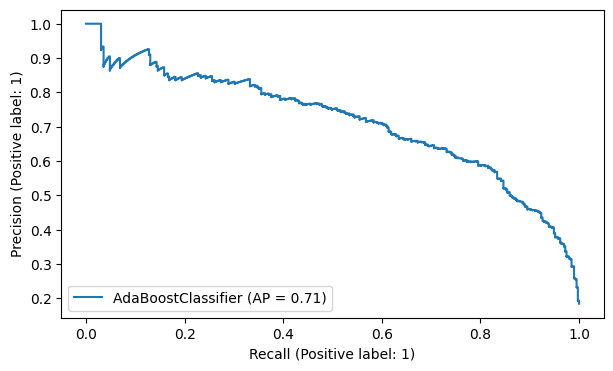

In [ ]:
PrecisionRecallDisplay.from_estimator(ada,
                                      X_test_count,
                                      y_test);

In [ ]:
y_pred = ada.predict(X_test_count)
y_pred_proba= ada.predict_proba(X_test_count)[:,1]

ada_AP_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
ada = AdaBoostClassifier(n_estimators= 100,
                         random_state = 42,
                         learning_rate=0.7)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=100, random_state=42)

In [ ]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[1663   64]
 [ 192  199]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1727
           1       0.76      0.51      0.61       391

    accuracy                           0.88      2118
   macro avg       0.83      0.74      0.77      2118
weighted avg       0.87      0.88      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     15534
           1       0.80      0.54      0.65      3523

    accuracy                           0.89     19057
   macro avg       0.85      0.75      0.79     19057
weighted avg       0.88      0.89      0.88     19057



In [ ]:
model = AdaBoostClassifier(n_estimators= 100,
                           random_state = 42,
                           learning_rate=0.7)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.886237
train_accuracy     0.894119
test_f1            0.632009
train_f1           0.658291
test_recall        0.529100
train_recall       0.551676
test_precision     0.786290
train_precision    0.816012
dtype: float64

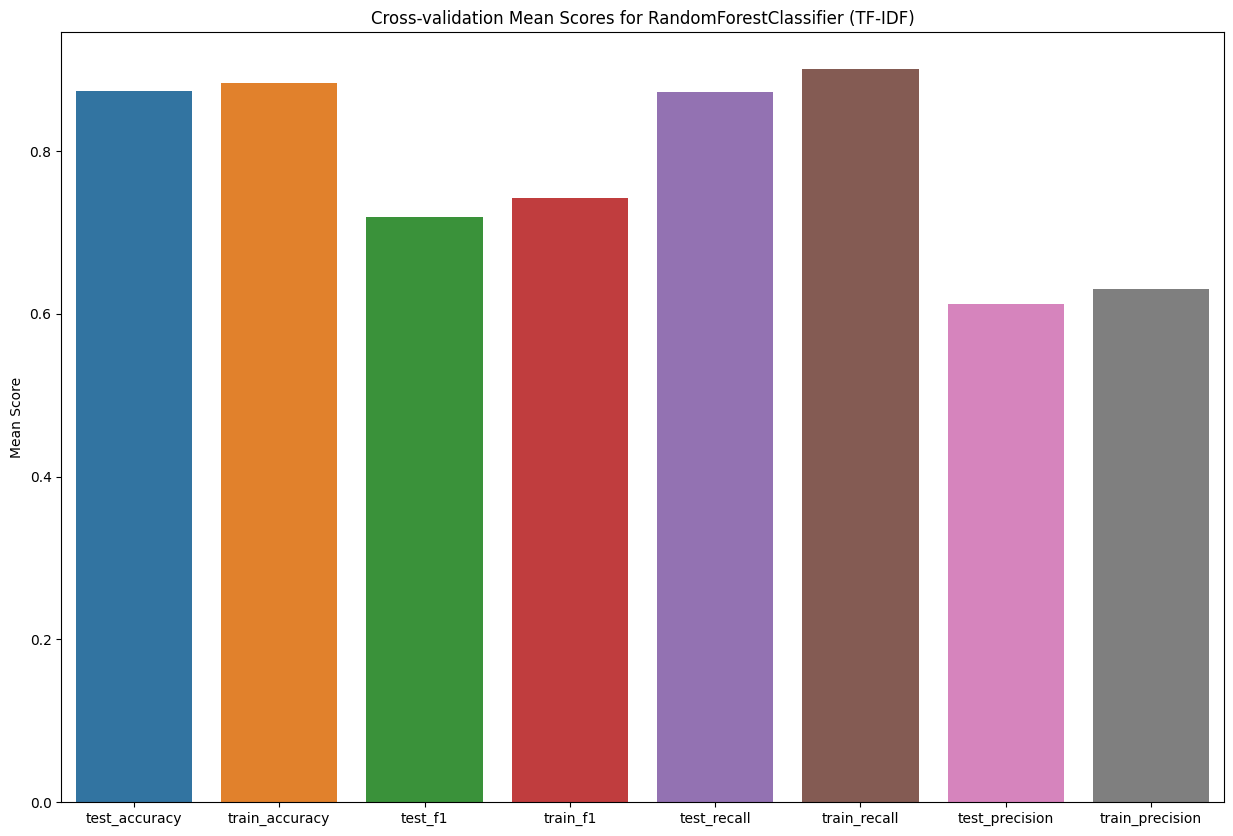

In [ ]:
# Plot the mean scores
plt.figure(figsize=(15, 10))
bar_plot = sns.barplot(x=mean_scores.index, y=mean_scores.values)
bar_plot.set_title('Cross-validation Mean Scores for RandomForestClassifier (TF-IDF)')
bar_plot.set_ylabel('Mean Score')

# Show the plot
plt.show()

In [ ]:
y_pred = ada.predict(X_test_tf_idf)
y_pred_proba= ada.predict_proba(X_test_tf_idf)[:,1]

ada_AP_tfidf = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

##**DL modeling**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
X

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "I was very happy to snag this dress at such a great price! it's very easy to slip on an

### Tokenization

In [ ]:
#Create a tokenizer
num_words = 15001
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'

In [ ]:
#used to update the internal vocabulary of the Tokenizer based on the input texts X.
#This method processes a list (or iterable) of texts and builds the vocabulary by
#assigning a unique integer index to each unique word in the corpus.
tokenizer.fit_on_texts(X)

### **Creating word index**

In [ ]:
#tokenizer.word_index attribute returns a dictionary where the keys are unique words in the corpus,
#and the values are their corresponding integer indices. This dictionary represents the word-to-index
#mapping learned by the Tokenizer during the fitting process.
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'are': 26,
 'fit': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'or': 35,
 'too': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'perfect': 50,
 'really': 51,
 'little': 52,
 'ordered': 53,
 'if': 54,
 'these': 55,
 'will': 56,
 'one': 57,
 'flattering': 58,
 'soft': 59,
 'well': 60,
 'an': 61,
 'out': 62,
 'can': 63,
 'comfortable': 64,
 'back': 65,
 'because': 66,
 'had': 67,
 'bought': 68,
 '\r': 69,
 'nice': 70,
 'cute': 71,
 'beautiful': 72,
 'than': 73,
 'fits': 74,
 'looks': 75,
 'all': 76,
 'when': 77,
 'bit': 78,
 'down': 79,


### **Converting tokens to numeric**

In [ ]:
#convert a list of texts X into sequences of integers.
X_num_tokens = tokenizer.texts_to_sequences(X)

###**Maximum number of tokens for all documents¶**



In [ ]:
#calculating the number of tokens for each sequence in X_num_tokens and then converting it into a NumPy array
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
#calculates the mean (average) of the values in the num_tokens
num_tokens.mean()

60.2330106257379

In [ ]:
#calculates the maximum value in the num_tokens
num_tokens.max()

116

In [ ]:
#ensure that your sequences are within a certain length limit.
max_tokens = 116

In [ ]:
# used to determine what fraction of your data fits within a certain length constraint.
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### **Fixing token counts of all documents (pad_sequences)**

In [ ]:
X_pad = pad_sequences(X_num_tokens,
                      maxlen = max_tokens)

In [ ]:
X_pad.shape

(21175, 116)

### Train Set Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=101)

## **Modeling**

In [ ]:
model = Sequential()

In [ ]:
embedding_size = 50

In [ ]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = Adam(learning_rate=0.001)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [ ]:
model.summary()

# embedding_size * num_words ==> 50 * 15001 = 750050

# 3 x (n2 + nm + 2n) m= input, n= output
# (50*50 + 50*50 + 2*50)*3 = 15.300 ==> m = 50, n = 50
# (25*25 + 50*25 + 2*25)*3 = 5775   ==> m = 50, n = 25
# (12*12 + 25*12 + 2*12)*3 = 1404   ==> m = 24, n = 12
# 12*1 + 1 = 13


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           750050    
                                                                 
 dropout (Dropout)           (None, 116, 50)           0         
                                                                 
 gru (GRU)                   (None, 116, 50)           15300     
                                                                 
 dropout_1 (Dropout)         (None, 116, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 116, 25)           5775      
                                                                 
 dropout_2 (Dropout)         (None, 116, 25)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience = 2,
                           restore_best_weights=True)

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train)
pd.Series(classes_weights).unique()

array([0.61339642, 2.70465512])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
149/149 [==============================] - 38s 162ms/step - loss: 0.4614 - recall: 0.7340 - val_loss: 0.3498 - val_recall: 0.8900
Epoch 2/10
149/149 [==============================] - 23s 151ms/step - loss: 0.2482 - recall: 0.9228 - val_loss: 0.2736 - val_recall: 0.8798
Epoch 3/10
149/149 [==============================] - 22s 147ms/step - loss: 0.1945 - recall: 0.9432 - val_loss: 0.2780 - val_recall: 0.8517
Epoch 3: early stopping


### **Model evaluation**

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.461355,0.734033,0.349791,0.890026
1,0.248178,0.922793,0.273589,0.879795
2,0.194472,0.943230,0.278028,0.851662


<Axes: >

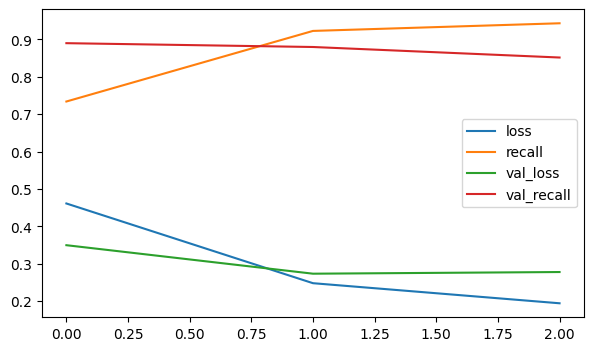

In [ ]:
model_loss.plot()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

67/67 [==============================] - 2s 24ms/step
[[1443  284]
 [  43  348]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1727
           1       0.55      0.89      0.68       391

    accuracy                           0.85      2118
   macro avg       0.76      0.86      0.79      2118
weighted avg       0.89      0.85      0.86      2118



In [ ]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

596/596 [==============================] - 12s 20ms/step
[[13270  2264]
 [  175  3348]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.85      0.92     15534
           1       0.60      0.95      0.73      3523

    accuracy                           0.87     19057
   macro avg       0.79      0.90      0.82     19057
weighted avg       0.91      0.87      0.88     19057



67/67 [==============================] - 1s 20ms/step


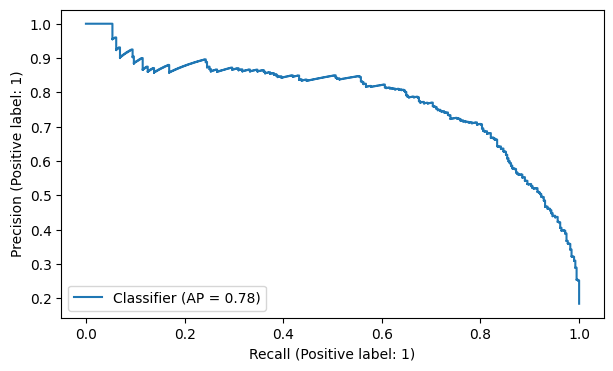

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)


In [ ]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.7821112483713252

## **BERT Modeling**

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.1 MB/s eta 0:00:00


### Tokenization

In [ ]:
X

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "I was very happy to snag this dress at such a great price! it's very easy to slip on an

In [ ]:
from transformers import AutoTokenizer #BertTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_sent_tokens = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

(…)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

(…)rt-base-uncased/resolve/main/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

(…)bert-base-uncased/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)base-uncased/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Max sentence length:  162


In [ ]:
np.array(num_of_sent_tokens).mean()

76.31556080283353

In [ ]:
sum(np.array(num_of_sent_tokens) <= 162) / len(num_of_sent_tokens)

1.0

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                        y,
                                                        test_size=0.1,
                                                        stratify=y,
                                                        random_state=101)

In [ ]:
all_sentence_tokens = tokenizer(list(X),
                                max_length=162,
                                truncation=True,
                                padding='max_length',
                                add_special_tokens=True)

In [ ]:
np.array(all_sentence_tokens['input_ids'])

array([[ 101, 7078, 6919, ...,    0,    0,    0],
       [ 101, 2293, 2023, ...,    0,    0,    0],
       [ 101, 1045, 2018, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 2001, ...,    0,    0,    0],
       [ 101, 2023, 4906, ...,    0,    0,    0],
       [ 101, 2023, 4377, ...,    0,    0,    0]])

In [ ]:
np.array(all_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [ ]:
def transformation(X):
  # set array dimensions
  seq_len = 162

  all_sentence_tokens = tokenizer(list(X),
                                  max_length=seq_len,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [ ]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [ ]:
Xids_train

array([[ 101, 2025, 2469, ...,    0,    0,    0],
       [ 101, 3504, 2428, ...,    0,    0,    0],
       [ 101, 2023, 2003, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 2293, ...,    0,    0,    0],
       [ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 1996, 6302, ...,    0,    0,    0]])

In [ ]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)


Xids_train.shape  : (19057, 162)
Xmask_train.shape : (19057, 162)
Xids_test.shape   : (2118, 162)
Xmask_test.shape  : (2118, 162)


In [ ]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

### Transformation Matrix to Tensorflow Tensor

In [ ]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [ ]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [ ]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

## **Batch Size**

In [ ]:
batch_size = 32

# batch_size
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)


In [ ]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.2 MB/s eta 0:00:00


In [ ]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [349]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1192
119
